In [1]:
# k-means

from sklearn.datasets import make_blobs

# 构造示例数据
blobs, _ = make_blobs(n_samples=200, centers=3, random_state=18)
blobs[:10]  # 打印出前 10 条数据的信息

array([[ 8.28390539,  4.98011149],
       [ 7.05638504,  7.00948082],
       [ 7.43101466, -6.56941148],
       [ 8.20192526, -6.4442691 ],
       [ 3.15614247,  0.46193832],
       [ 7.7037692 ,  6.14317389],
       [ 5.62705611, -0.35067953],
       [ 7.53828533, -4.86595492],
       [ 8.649291  ,  3.98488194],
       [ 7.91651636,  4.54935348]])

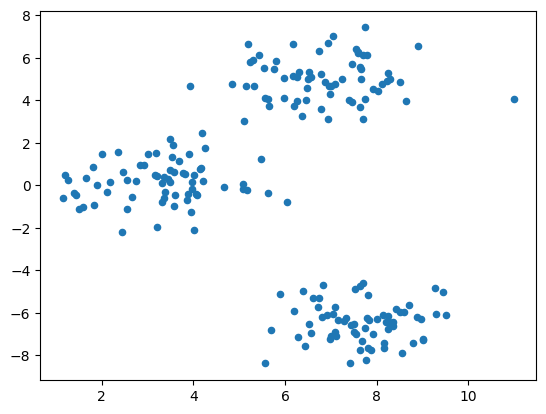

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(blobs[:, 0], blobs[:, 1], s=20)  # 数据展示

In [3]:
import numpy as np


def random_k(k, data):
    """
    参数:
    k -- 中心点个数
    data -- 数据集

    返回:
    init_centers -- 初始化中心点
    """
    # 初始化中心点
    prng = np.random.RandomState(27)  # 定义随机种子
    num_feature = np.shape(data)[1]
    # 初始化从标准正态分布返回的一组随机数，为了更加贴近数据集这里乘了一个 5
    init_centers = prng.randn(k, num_feature) * 5
    return init_centers


init_centers = random_k(3, blobs)
init_centers

array([[ 6.42802708, -1.51776689],
       [ 3.09537831,  1.97999275],
       [ 1.11702824, -0.27169709]])

In [7]:
def d_euc(x, y):
    """
    参数:
    x -- 数据 a
    y -- 数据 b

    返回:
    d -- 数据 a 和 b 的欧氏距离
    """
    # 计算欧氏距离
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

In [8]:
def update_center(clusters, data, centers):
    """
    参数:
    clusters -- 每一点分好的类别 array: pointIndex -> centerIndex
    data -- 数据集             array: pointData
    centers -- 中心点集合       array: centerData

    返回:
    new_centers -- 新中心点集合
    """
    # 中心点的更新
    num_centers = np.shape(centers)[0]  # 中心点的个数
    num_features = np.shape(centers)[1]  # 每一个中心点的特征数
    container = []

    for x in range(num_centers):
        each_container = []
        # [num_centers][]
        container.append(each_container)  # 首先创建一个容器，将相同类别数据存放到一起

    # 数据分类
    for i, cluster in enumerate(clusters):
        # centerIndex -> [point]
        container[cluster].append(data[i])

    new_centers = []
    for i in range(len(container)):
        # 分类数据的平均值作为新的中心点
        each_center = np.mean(container[i], axis=0)  # 计算每一子集中数据均值作为中心点
        new_centers.append(each_center)

    return np.vstack(new_centers)  # 使用 np.vstack 将数组垂直堆叠


def kmeans_cluster(data, init_centers, k):
    
    
    
    """
    参数:
    data -- 数据集
    init_centers -- 初始化中心点集合
    k -- 中心点个数

    返回:
    centers_container -- 每一次更新中心点的集合
    cluster_container -- 每一次更新类别的集合
    """
    # K-Means 聚类
    max_step = 50  # 定义最大迭代次数，中心点最多移动的次数。

    # 当变化值小于 epsilon 表示已经分类结束？
    epsilon = 0.001  # 定义一个足够小的数，通过中心点变化的距离是否小于该数，判断中心点是否变化。

    old_centers = init_centers

    centers_container = []  # 建立一个中心点容器，存放每一次变化后的中心点，以便后面的绘图。
    cluster_container = []  # 建立一个分类容器，存放每一次中心点变化后数据的类别
    
    # [{oldCenter}]
    centers_container.append(old_centers)

    for step in range(max_step):
        cluster = np.array([], dtype=int)
        for each_data in data:
            # distance between center and current point
            distances = np.array([]) # [centerLengtht]
            for each_center in old_centers:
                temp_distance = d_euc(each_data, each_center)  # 计算样本和中心点的欧式距离
                distances = np.append(distances, temp_distance)
            # fing nearest point index ===> centerIndex
            lab = np.argmin(distances)  # 返回距离最近中心点的索引，即按照最近中心点分类
            # arr: pointIndex -> centerIndex
            cluster = np.append(cluster, lab)
        # [{old pointIndex -> centerIndex }]
        cluster_container.append(cluster)

        new_centers = update_center(cluster, data, old_centers)  # 根据子集分类更新中心点

        # 计算每个中心点更新前后之间的欧式距离
        difference = []
        for each_old_center, each_new_center in zip(old_centers, new_centers):
            difference.append(d_euc(each_old_center, each_new_center))

        if (np.array(difference) < epsilon).all():  # 判断每个中心点移动是否均小于 epsilon
            return centers_container, cluster_container

        centers_container.append(new_centers)
        old_centers = new_centers

    return centers_container, cluster_container

# init_centers： 二维数组 中心点数组
# blobs： 二维数组，分类数据

# 计算最终中心点
centers_container, cluster_container = kmeans_cluster(blobs, init_centers, 3)
final_center = centers_container[-1]
final_cluster = cluster_container[-1]
final_center

array([[ 7.67007252, -6.44697348],
       [ 6.83832746,  4.98604668],
       [ 3.28477676,  0.15456871]])

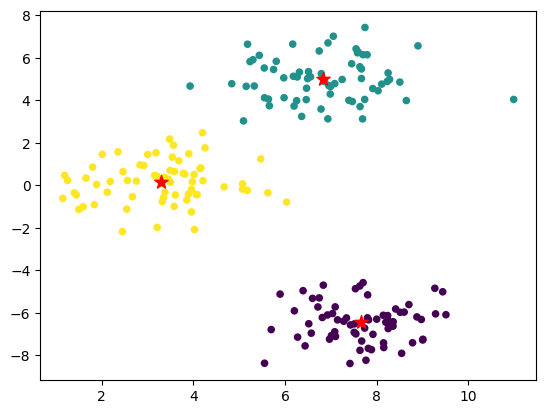

In [9]:
# 可视化展示
plt.scatter(blobs[:, 0], blobs[:, 1], s=20, c=final_cluster)
plt.scatter(final_center[:, 0], final_center[:, 1], s=100, marker="*", c="r")

Text(0.5, 1.0, 'final center')

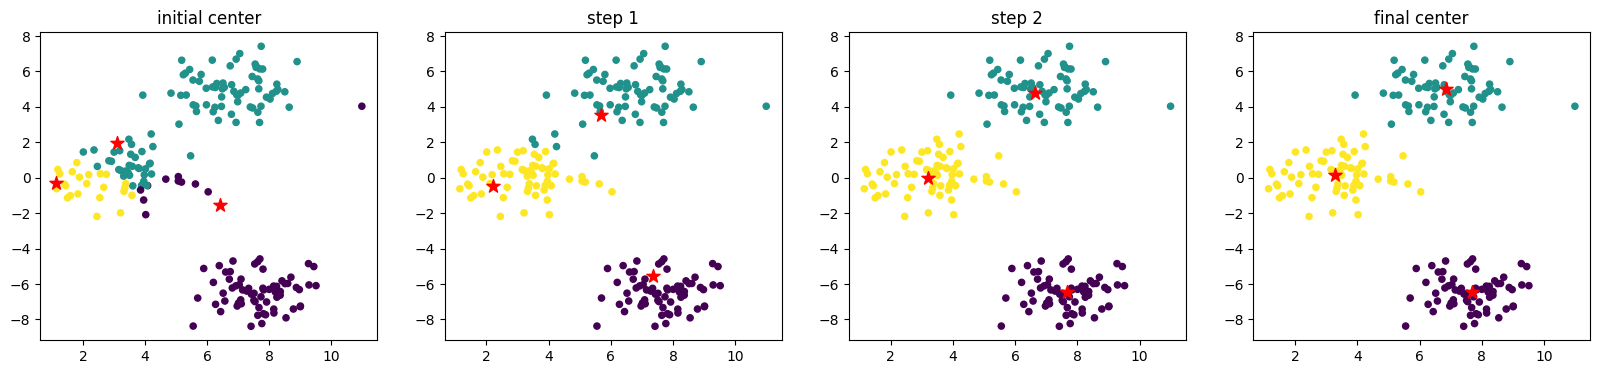

In [10]:
# 每一次迭代的变化
num_axes = len(centers_container)

fig, axes = plt.subplots(1, num_axes, figsize=(20, 4))

axes[0].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[0])
axes[0].scatter(init_centers[:, 0], init_centers[:, 1], s=100, marker="*", c="r")
axes[0].set_title("initial center")

for i in range(1, num_axes - 1):
    axes[i].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[i])
    axes[i].scatter(
        centers_container[i][:, 0], centers_container[i][:, 1], s=100, marker="*", c="r"
    )
    axes[i].set_title("step {}".format(i))

axes[-1].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[-1])
axes[-1].scatter(final_center[:, 0], final_center[:, 1], s=100, marker="*", c="r")
axes[-1].set_title("final center")

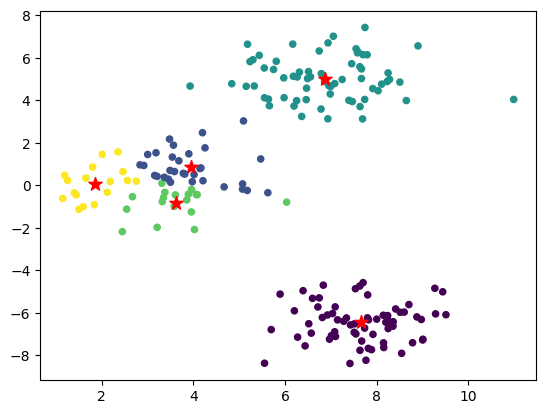

In [11]:
# 用 scikit-learn 聚类并绘图
from sklearn.cluster import k_means

model = k_means(blobs, n_clusters=5, n_init="auto")

centers = model[0]
clusters_info = model[1]
plt.scatter(blobs[:, 0], blobs[:, 1], s=20, c=clusters_info)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker="*", c="r")

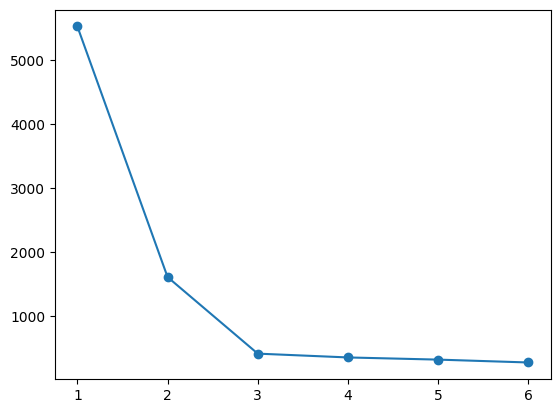

In [12]:
index = []  # 横坐标数组
inertia = []  # 纵坐标数组

# K 从 1~ 6 聚类
for i in range(6):
    model = k_means(blobs, n_clusters=i + 1, n_init="auto")
    index.append(i + 1)
    # 取 SSE
    inertia.append(model[2])

# 绘制折线图
plt.plot(index, inertia, "-o")

In [ ]:
# k-means++

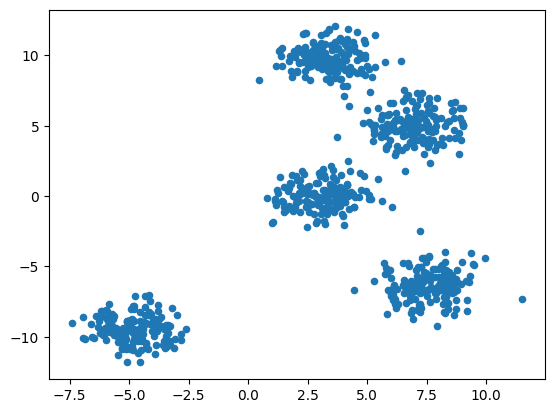

In [13]:
blobs_plus, _ = make_blobs(n_samples=800, centers=5, random_state=18)  # 生成数据
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20)  # 将数据可视化展示

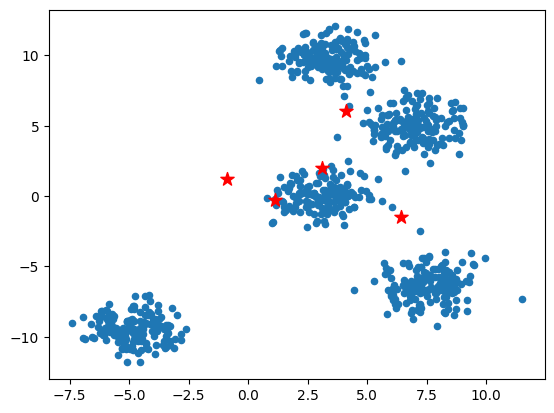

In [14]:
km_init_center = random_k(5, blobs_plus)

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20)
plt.scatter(km_init_center[:, 0], km_init_center[:, 1], s=100, marker="*", c="r")

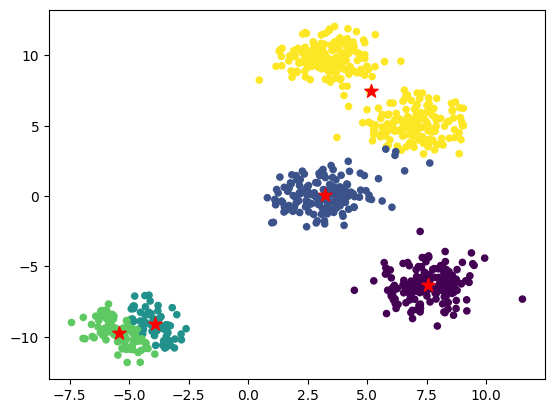

In [15]:
# 使用传统聚类，可以发现最终聚类效果有问题，出现了局部最优问题

km_centers, km_clusters = kmeans_cluster(blobs_plus, km_init_center, 5)
km_final_center = km_centers[-1]
km_final_cluster = km_clusters[-1]
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=km_final_cluster)
plt.scatter(km_final_center[:, 0], km_final_center[:, 1], s=100, marker="*", c="r")